## https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e

In [1]:
from lifelines import KaplanMeierFitter

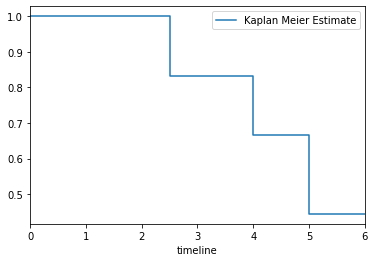

In [31]:
## Example Data 
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 0]

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

## https://lifelines.readthedocs.io/en/latest/Quickstart.html 

In [3]:
from lifelines import *

In [62]:
durations = [5,6,6,2.5,4,4]
eventObserved = [1, 0, 0, 1, 1, 1]
durations2 = [i+1 for i in durations]
eventObserved2 = [abs(i-1) for i in eventObserved]

In [16]:
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed=eventObserved)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 6 total observations, 2 right-censored observations>

In [18]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
2.5,0.833333
4.0,0.500000
5.0,0.333333
6.0,0.333333


In [19]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
2.5,0.166667
4.0,0.500000
5.0,0.666667
6.0,0.666667


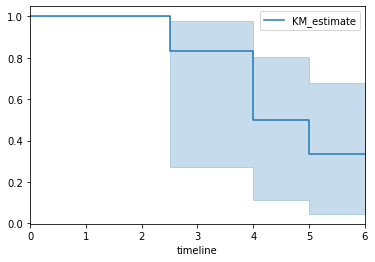

In [10]:
kmf.plot_survival_function()

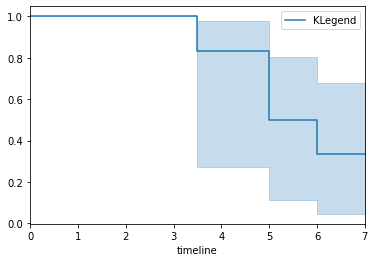

In [32]:
kmf = KaplanMeierFitter()
kmf.fit(durations2, event_observed=eventObserved, label='KLegend')
kmf.plot_survival_function()

## https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

In [46]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from matplotlib import pyplot as plt
from lifelines.datasets import load_rossi

In [35]:
df = pd.DataFrame({
    'T': [5, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'E': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    'month': [10, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'age': [4, 3, 9, 8, 7, 4, 4, 3, 2, 5, 6, 7],
    'id': [1, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6, 7]
})

In [37]:
rossi = load_rossi()

cph_spline = CoxPHFitter(baseline_estimation_method="spline", n_baseline_knots=5)
cph_spline.fit(rossi, 'week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [49]:
rossi.head(10)

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
5,52,0,0,24,1,1,0,0,2
6,23,1,0,25,1,1,1,1,0
7,52,0,1,21,1,1,0,1,4
8,52,0,0,22,1,0,0,0,6
9,52,0,0,20,1,1,0,0,0


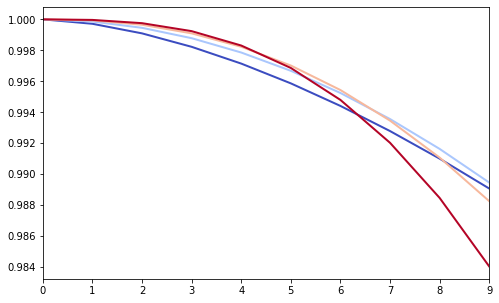

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

wft_model_rho = WeibullAFTFitter().fit(rossi, 'week', 'arrest', ancillary=True, timeline=np.arange(0, 10))
wft_model_rho.plot_partial_effects_on_outcome('prio', range(0, 16, 5), cmap='coolwarm', ax=ax, lw=2, plot_baseline=False)

ax.get_legend().remove()

## https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html 

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from lifelines import *

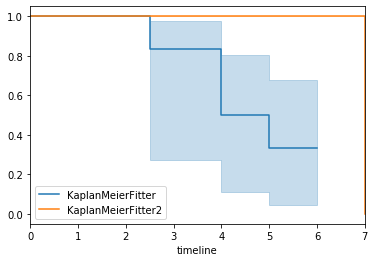

In [64]:
kmf = KaplanMeierFitter().fit(durations, eventObserved, label='KaplanMeierFitter')
ax = kmf.plot()
kmf = KaplanMeierFitter().fit(durations2, eventObserved2, label='KaplanMeierFitter2')
ax = kmf.plot(ax=ax)

In [67]:
durations, durations2, eventObserved, eventObserved2

([5, 6, 6, 2.5, 4, 4],
 [6, 7, 7, 3.5, 5, 5],
 [1, 0, 0, 1, 1, 1],
 [0, 1, 1, 0, 0, 0])

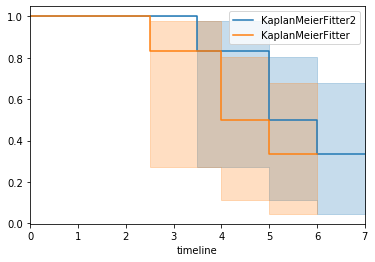

In [72]:
kmf = KaplanMeierFitter().fit(durations2, eventObserved, label='KaplanMeierFitter2')
ax = kmf.plot()
kmf = KaplanMeierFitter().fit(durations, eventObserved, label='KaplanMeierFitter')
ax = kmf.plot(ax=ax)

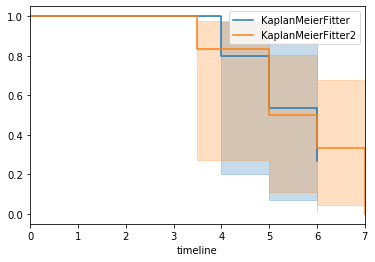

In [80]:
kmf = KaplanMeierFitter().fit(durations, [1, 0, 1, 0, 1, 0], label='KaplanMeierFitter')
ax = kmf.plot()
kmf = KaplanMeierFitter().fit(durations2, [1, 1, 1, 1, 1, 1], label='KaplanMeierFitter2')
ax = kmf.plot(ax=ax)